In [1]:
random_seed = 0

- multipurpose algorithm for classification, regression, and multi-output
- strong for very complex data set


### 6.1 Train and Visualization of Decision Tree


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

##


### 6.1.1 Plot the tree


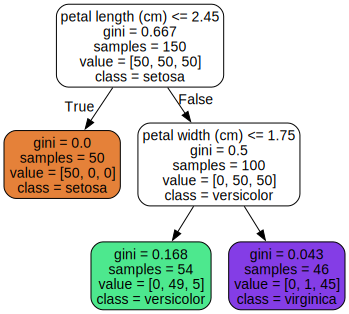

In [10]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
        tree_clf,
        out_file=str("./060/iris_tree.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("./060/iris_tree.dot")

# 6.2 Prediction

**information of the node**

- condition
- impurity score
- number of samples
- number of samples in each class
- prediction


# 6.3 Class Probability Prediction

- tree algorithm returns the ratio == prediction of each class in the leaf node


# 6.4 CART(classification and regression tree) Algorithm

- find the best pair (k, t_k) which produces the least loss function


# 6.5 Computation Complexity

- the CART algorithm doesn't depend on the number of features. Hence, it's good for a large dataset


# 6.6 Gini or Entropy Impurity Measure?

- Both produces similar results, but the Gini is faster then the Entropy, so it's more preferred


# 6.7 Regulation

Important regulation parameters of tree alhorithm

파라미터 기능 값의 효과

max_features

- 분할 시 고려할 최대 특징 수 제한 값
- 작음 → 단순 / 큼 → 복잡

max_leaf_nodes

- 트리의 최대 리프 노드 수 제한 값
- 작음 → 단순 / 큼 → 복잡

min_samples_split

- 노드 분할에 필요한 최소 샘플 수 값
- 작음 → 복잡 / 큼 → 단순

min_samples_leaf

- 리프 노드의 최소 샘플 수 제한 값
- 작음 → 복잡 / 큼 → 단순

min_weight_fraction_leaf

- 리프 노드의 최소 가중치 합 비율 제한 값
- 작음 → 복잡 / 큼 → 단순


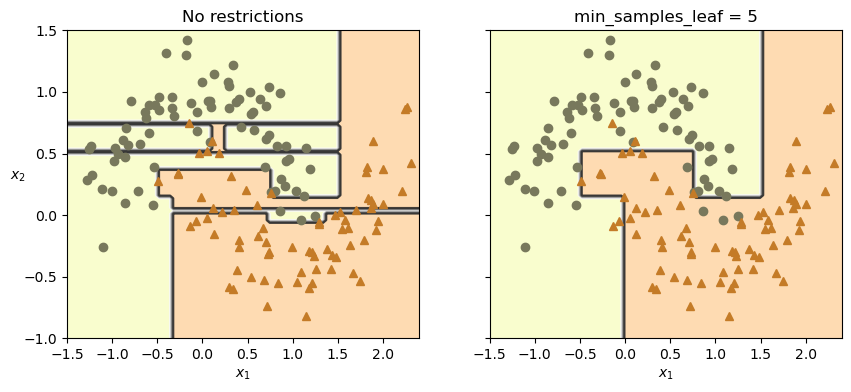

In [19]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [21]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
print(f"Score with overfitting: {tree_clf1.score(X_moons_test, y_moons_test)}")
print(f"Score without overfitting: {tree_clf2.score(X_moons_test, y_moons_test)}")

Score with overfitting: 0.898
Score without overfitting: 0.92


# 6.8 Regression

- CART algorithm can be used for regression


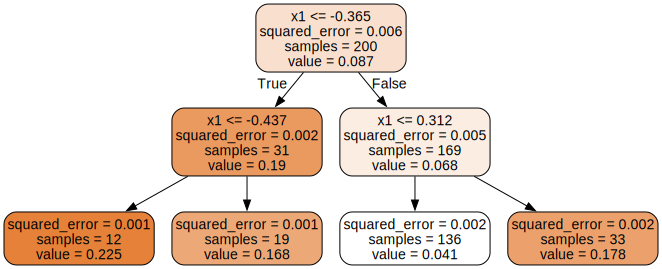

In [23]:
from sklearn.tree import DecisionTreeRegressor

X_quad = np.random.rand(200, 1) - 0.5  # 간단한 랜덤한 입력 특성
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

export_graphviz(
    tree_reg,
    out_file=str("./060/regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file( "./060/regression_tree.dot")

# 6.9 Sensitive to the Axis


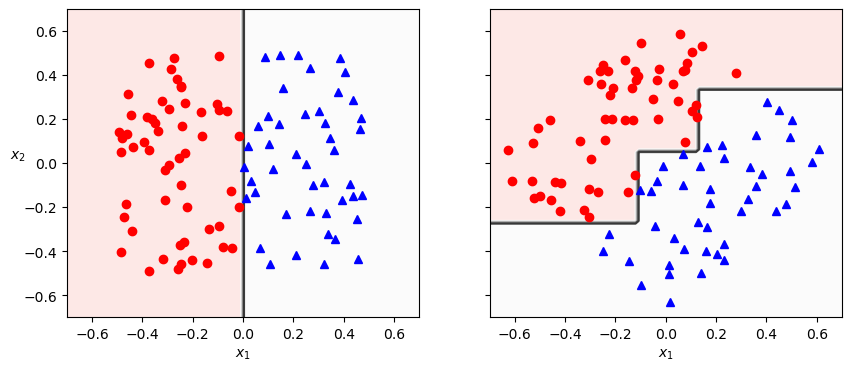

In [24]:
# 추가 코드 - 이 셀은 그림 6-7을 생성하고 저장합니다.

np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 도
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")
plt.show()

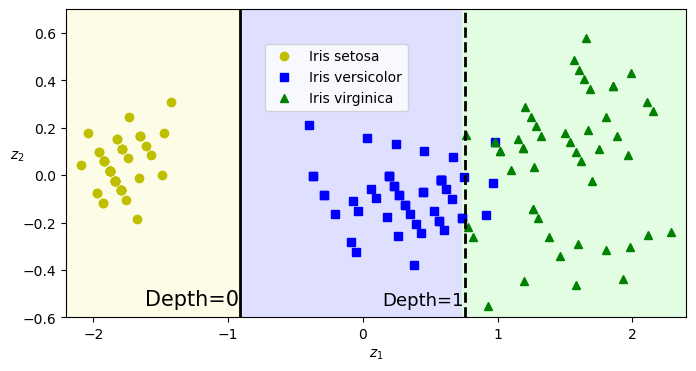

In [27]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)


custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])


plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
plt.show()